In [ ]:
import torch
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as opt
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
train_dataset = MNIST(root = './', train=True, download=True, transform=transforms.ToTensor())
test_dataset= MNIST(root = './', train=False, download=True, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
num_epochs = 10
batch_size = 100
learning_rate = 0.005
num_test_img = 5

In [ ]:
train_loader = Data.DataLoader(dataset=train_dataset, 
                               batch_size=batch_size, 
                               shuffle=True)
test_loader = Data.DataLoader(dataset=test_dataset, 
                               batch_size=batch_size, 
                               shuffle=False) # shuffle=False

In [ ]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(in_features=28*28, out_features=128),
        nn.Tanh(),
        nn.Linear(in_features=128, out_features=64),
        nn.Tanh(),
        nn.Linear(in_features=64, out_features=12),
        nn.Tanh(),
        nn.Linear(in_features=12, out_features=3)
    )
    self.decoder = nn.Sequential(
        nn.Linear(in_features=3, out_features=12),
        nn.Tanh(),
        nn.Linear(in_features=12, out_features=64),
        nn.Tanh(),
        nn.Linear(in_features=64, out_features=128),
        nn.Tanh(),
        nn.Linear(in_features=128, out_features=28*28)
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
autoencoder = AutoEncoder()
autoencoder

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
  )
)

In [ ]:
loss_func = nn.MSELoss()
optimizer = opt.Adam(autoencoder.parameters(), lr=learning_rate)

In [ ]:
view_data = Variable(
    # test_dataset.data -> img
    test_dataset.data[:num_test_img].view(-1, 28*28).type(torch.FloatTensor)/255.
    )

epoch: 0, loss: 0.1160


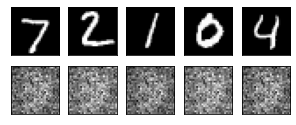

epoch: 0, loss: 0.0507


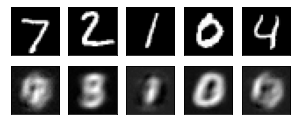

epoch: 0, loss: 0.0529


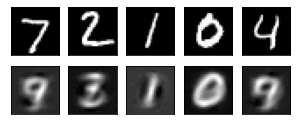

epoch: 0, loss: 0.0501


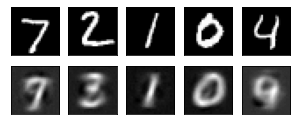

epoch: 0, loss: 0.0477


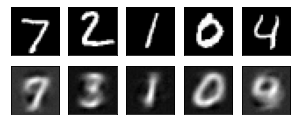

epoch: 0, loss: 0.0461


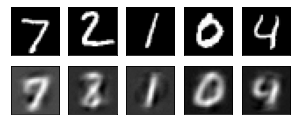

epoch: 1, loss: 0.0468


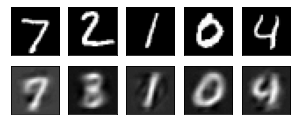

epoch: 1, loss: 0.0451


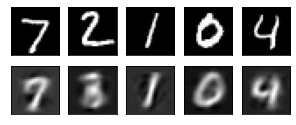

epoch: 1, loss: 0.0464


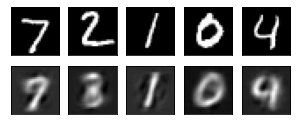

epoch: 1, loss: 0.0425


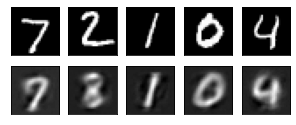

epoch: 1, loss: 0.0407


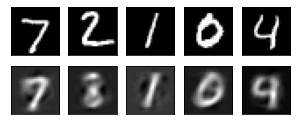

epoch: 1, loss: 0.0424


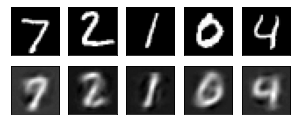

epoch: 2, loss: 0.0426


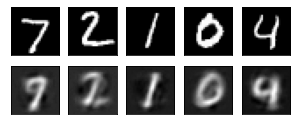

epoch: 2, loss: 0.0411


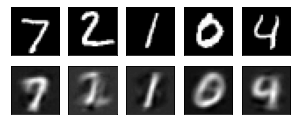

epoch: 2, loss: 0.0405


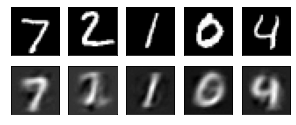

epoch: 2, loss: 0.0389


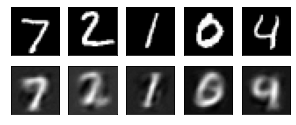

epoch: 2, loss: 0.0465


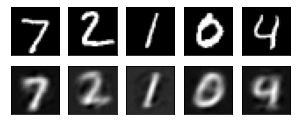

epoch: 2, loss: 0.0408


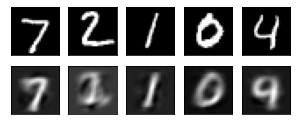

epoch: 3, loss: 0.0407


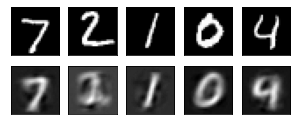

epoch: 3, loss: 0.0421


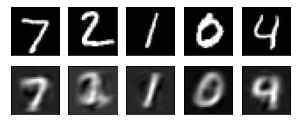

epoch: 3, loss: 0.0430


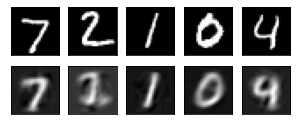

epoch: 3, loss: 0.0448


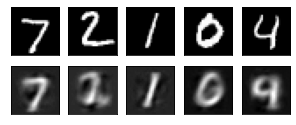

epoch: 3, loss: 0.0404


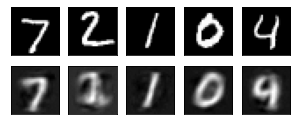

epoch: 3, loss: 0.0367


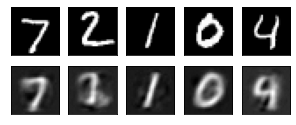

epoch: 4, loss: 0.0412


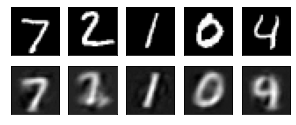

epoch: 4, loss: 0.0403


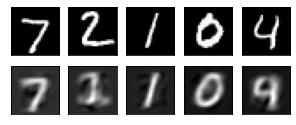

epoch: 4, loss: 0.0411


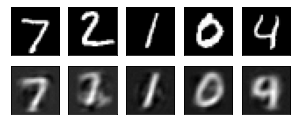

epoch: 4, loss: 0.0390


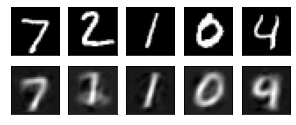

epoch: 4, loss: 0.0427


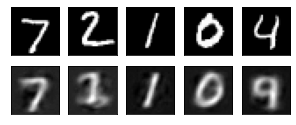

epoch: 4, loss: 0.0408


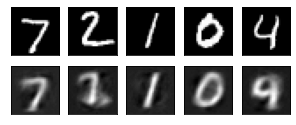

epoch: 5, loss: 0.0392


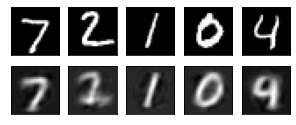

epoch: 5, loss: 0.0396


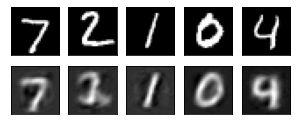

epoch: 5, loss: 0.0365


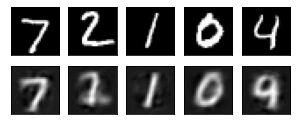

epoch: 5, loss: 0.0397


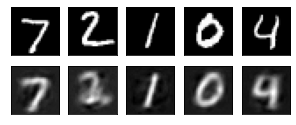

epoch: 5, loss: 0.0372


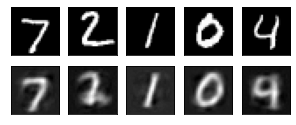

epoch: 5, loss: 0.0408


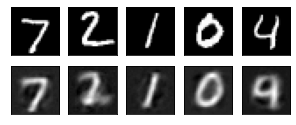

epoch: 6, loss: 0.0388


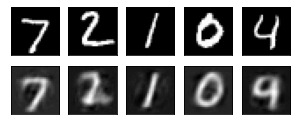

epoch: 6, loss: 0.0385


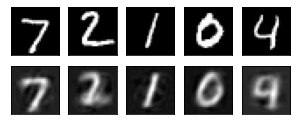

epoch: 6, loss: 0.0391


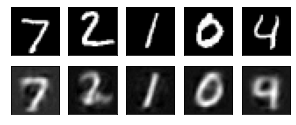

epoch: 6, loss: 0.0386


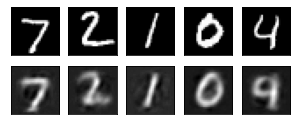

epoch: 6, loss: 0.0373


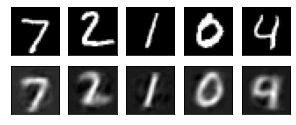

epoch: 6, loss: 0.0367


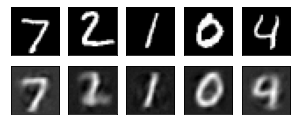

epoch: 7, loss: 0.0380


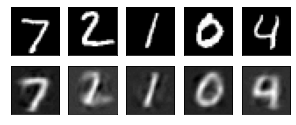

epoch: 7, loss: 0.0363


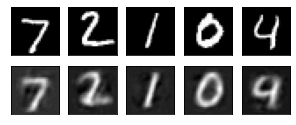

epoch: 7, loss: 0.0368


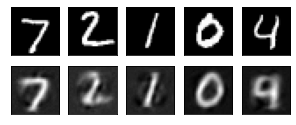

epoch: 7, loss: 0.0370


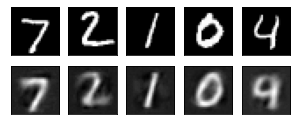

epoch: 7, loss: 0.0366


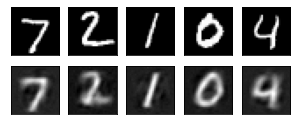

epoch: 7, loss: 0.0399


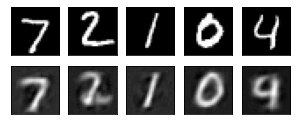

epoch: 8, loss: 0.0355


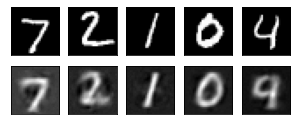

epoch: 8, loss: 0.0383


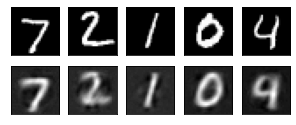

epoch: 8, loss: 0.0377


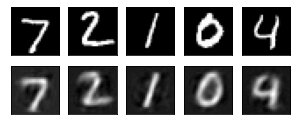

epoch: 8, loss: 0.0419


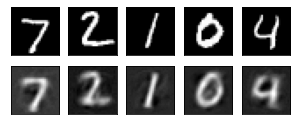

epoch: 8, loss: 0.0363


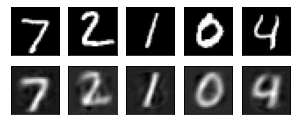

epoch: 8, loss: 0.0371


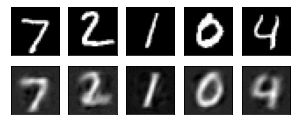

epoch: 9, loss: 0.0371


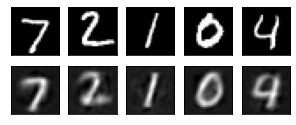

epoch: 9, loss: 0.0359


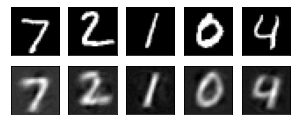

epoch: 9, loss: 0.0385


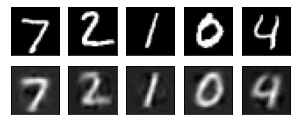

epoch: 9, loss: 0.0365


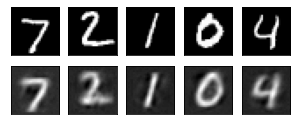

epoch: 9, loss: 0.0374


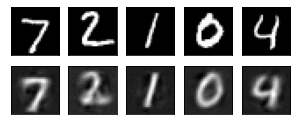

epoch: 9, loss: 0.0403


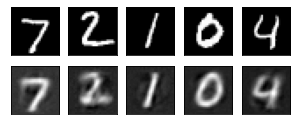

In [ ]:
for epoch in range(num_epochs):
  for idx, (x, labels) in enumerate(train_loader):
    batch_x = Variable(x.view(-1, 28*28))
    batch_y = Variable(x.view(-1, 28*28)) # true target in autoencoder
    batch_labels = Variable(labels)
    
    optimizer.zero_grad()
    encoded, decoded = autoencoder(batch_x)
    loss = loss_func(decoded, batch_y)
    loss.backward()

    optimizer.step()

    if (idx%100) == 0:
      print('epoch: %d, loss: %.4f' %(epoch, loss.data))
      _, decoded_test = autoencoder(view_data)
      f, a = plt.subplots(nrows=2, ncols=num_test_img, figsize=(5,2)) # a 位置
      for j in range(num_test_img):
        
        # row1
        a[0][j].imshow(view_data.data.numpy()[j].reshape(28, 28), cmap="gray") 
        a[0][j].set_xticks(())
        a[0][j].set_yticks(())

        # row2
        a[1][j].imshow(decoded_test.data.numpy()[j].reshape(28, 28), cmap="gray") 
        a[1][j].set_xticks(())
        a[1][j].set_yticks(())
      
      plt.draw()
      plt.show()

In [ ]:
m = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=2, stride=2)
a = torch.FloatTensor([[[ [1,2,3], [4,5,6], [7,8,9] ]]])
a.shape

torch.Size([1, 1, 3, 3])

In [ ]:
b = m(a)
print(b.shape)
print(b)

torch.Size([1, 1, 6, 6])
tensor([[[[-0.4282, -0.5398, -0.7697, -0.9929, -1.1111, -1.4460],
          [-0.0781, -0.4280, -0.0694, -0.7692, -0.0607, -1.1104],
          [-1.4526, -1.8991, -1.7940, -2.3522, -2.1355, -2.8053],
          [-0.0520, -1.4517, -0.0433, -1.7929, -0.0346, -2.1341],
          [-2.4769, -3.2584, -2.8184, -3.7115, -3.1599, -4.1646],
          [-0.0259, -2.4753, -0.0172, -2.8166, -0.0085, -3.1578]]]],
       grad_fn=<SlowConvTranspose2DBackward>)


In [ ]:
m = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=3)
a = torch.FloatTensor([[[ [1,2,3], [4,5,6], [7,8,9] ]]])
print(a.shape)
b = m(a)
print(b.shape)
print(b)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 9, 9])
tensor([[[[ 0.1095,  0.3102,  0.6148, -0.0709,  0.3306,  0.9396, -0.2513,
            0.3510,  1.2645],
          [ 0.3238,  0.0505,  0.4198,  0.3577, -0.1888,  0.5498,  0.3917,
           -0.4282,  0.6797],
          [ 0.4942,  0.0322,  0.2950,  0.6984, -0.2254,  0.3002,  0.9027,
           -0.4831,  0.3053],
          [-0.4317,  0.3714,  1.5894, -0.6121,  0.3917,  1.9142, -0.7925,
            0.4121,  2.2391],
          [ 0.4256, -0.6675,  0.8096,  0.4595, -0.9068,  0.9396,  0.4935,
           -1.1462,  1.0695],
          [ 1.1070, -0.7408,  0.3104,  1.3113, -0.9984,  0.3156,  1.5156,
           -1.2561,  0.3207],
          [-0.9729,  0.4325,  2.5640, -1.1533,  0.4528,  2.8888, -1.3337,
            0.4732,  3.2137],
          [ 0.5274, -1.3855,  1.1995,  0.5613, -1.6249,  1.3294,  0.5953,
           -1.8642,  1.4593],
          [ 1.7198, -1.5137,  0.3259,  1.9241, -1.7714,  0.3310,  2.1284,
           -2.0291,  0.3361]]]], grad_fn=<Sl

In [ ]:
class AutoEncoderCNN(nn.Module):
  def __init__(self):
    super(AutoEncoderCNN, self).__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        
        nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1), #7*7
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=7, stride=1) # 1*1
      )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=7, stride=1),
        nn.ReLU(),

        nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=2, stride=2),
        nn.ReLU(),

        nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=2, stride=2),
        nn.Sigmoid(),  # 圖片為0-255 用 relu 值可能會很大
    )
    
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
autoencoderCNN = AutoEncoderCNN()
autoencoderCNN.cuda()

AutoEncoderCNN(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=7, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (5): Sigmoid()
  )
)

In [ ]:
loss_func = nn.MSELoss()
optimizer = opt.Adam(autoencoderCNN.parameters(), lr=learning_rate)

In [ ]:
view_data = Variable(
    # test_dataset.data -> img
    test_dataset.data[:num_test_img].view(-1, 1, 28, 28).type(torch.cuda.FloatTensor)/255. # size, channel, w, h
    )

epoch: 0, loss: 0.1345


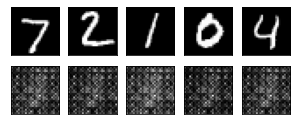

epoch: 0, loss: 0.0711


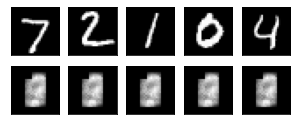

epoch: 0, loss: 0.0690


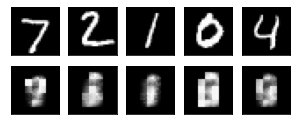

epoch: 0, loss: 0.0631


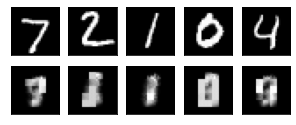

epoch: 0, loss: 0.0578


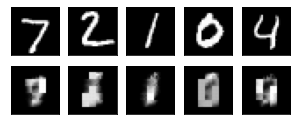

epoch: 0, loss: 0.0543


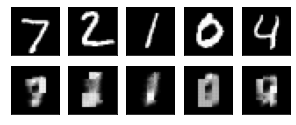

epoch: 1, loss: 0.0534


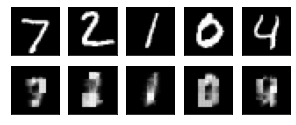

epoch: 1, loss: 0.0520


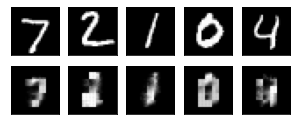

epoch: 1, loss: 0.0563


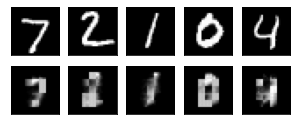

epoch: 1, loss: 0.0551


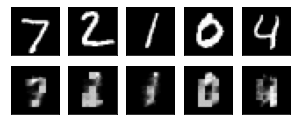

epoch: 1, loss: 0.0509


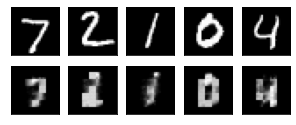

epoch: 1, loss: 0.0473


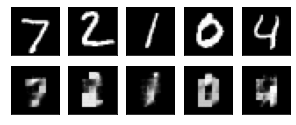

epoch: 2, loss: 0.0476


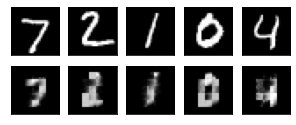

epoch: 2, loss: 0.0499


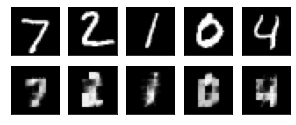

epoch: 2, loss: 0.0483


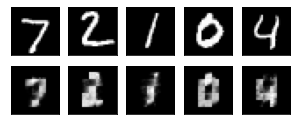

epoch: 2, loss: 0.0477


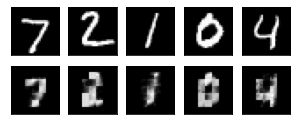

epoch: 2, loss: 0.0499


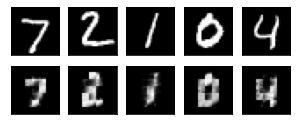

epoch: 2, loss: 0.0463


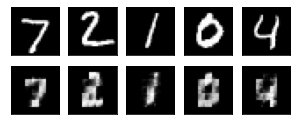

epoch: 3, loss: 0.0473


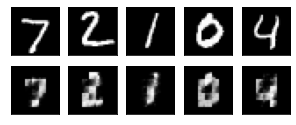

epoch: 3, loss: 0.0437


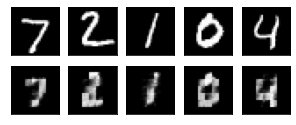

epoch: 3, loss: 0.0502


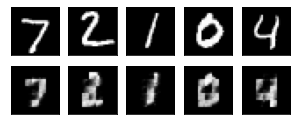

epoch: 3, loss: 0.0447


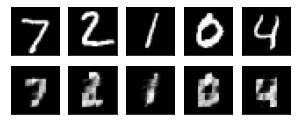

epoch: 3, loss: 0.0409


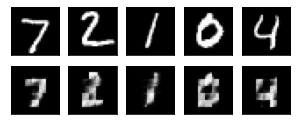

epoch: 3, loss: 0.0461


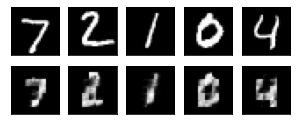

epoch: 4, loss: 0.0427


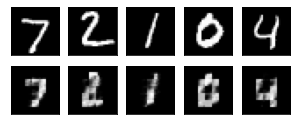

epoch: 4, loss: 0.0413


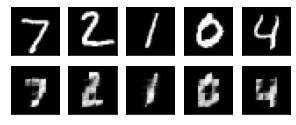

epoch: 4, loss: 0.0398


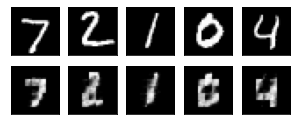

epoch: 4, loss: 0.0432


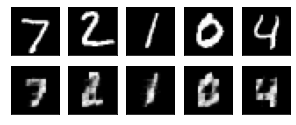

epoch: 4, loss: 0.0424


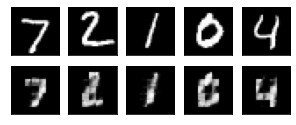

epoch: 4, loss: 0.0402


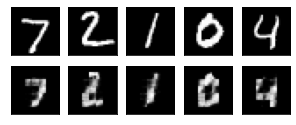

epoch: 5, loss: 0.0388


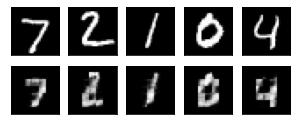

epoch: 5, loss: 0.0417


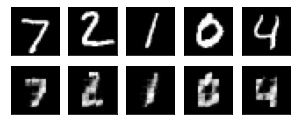

epoch: 5, loss: 0.0437


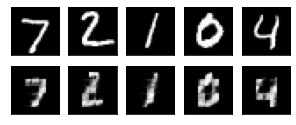

epoch: 5, loss: 0.0375


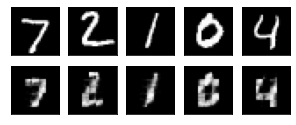

epoch: 5, loss: 0.0423


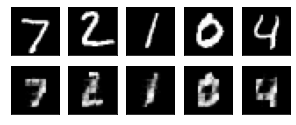

epoch: 5, loss: 0.0430


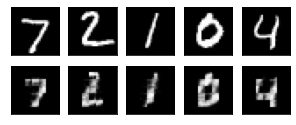

epoch: 6, loss: 0.0407


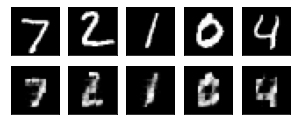

epoch: 6, loss: 0.0431


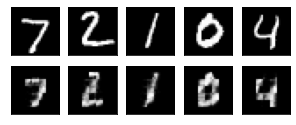

epoch: 6, loss: 0.0477


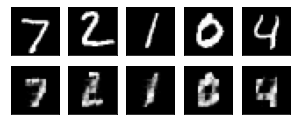

epoch: 6, loss: 0.0415


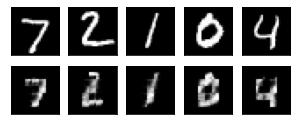

epoch: 6, loss: 0.0422


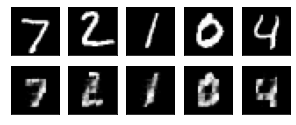

epoch: 6, loss: 0.0422


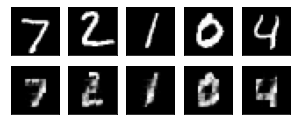

epoch: 7, loss: 0.0405


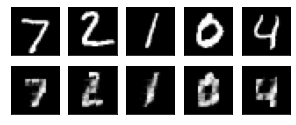

epoch: 7, loss: 0.0424


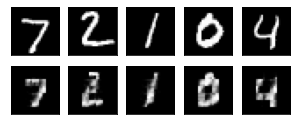

epoch: 7, loss: 0.0410


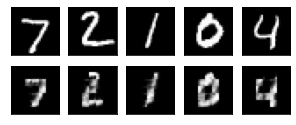

epoch: 7, loss: 0.0381


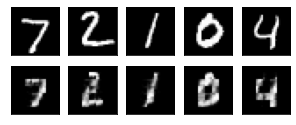

epoch: 7, loss: 0.0428


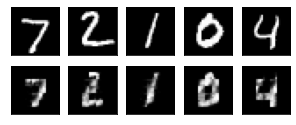

epoch: 7, loss: 0.0399


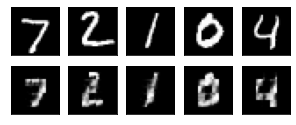

epoch: 8, loss: 0.0396


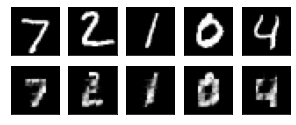

epoch: 8, loss: 0.0439


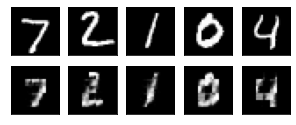

epoch: 8, loss: 0.0381


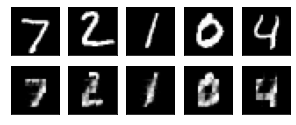

epoch: 8, loss: 0.0385


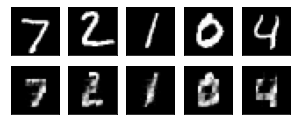

epoch: 8, loss: 0.0445


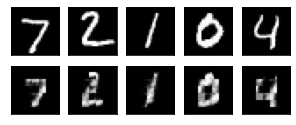

epoch: 8, loss: 0.0417


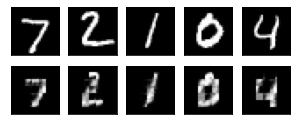

epoch: 9, loss: 0.0439


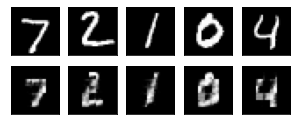

epoch: 9, loss: 0.0432


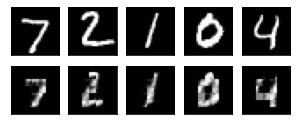

epoch: 9, loss: 0.0378


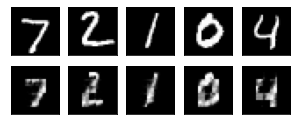

epoch: 9, loss: 0.0393


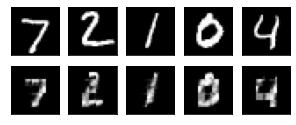

epoch: 9, loss: 0.0380


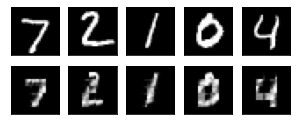

epoch: 9, loss: 0.0411


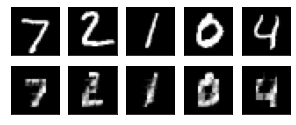

In [ ]:
for epoch in range(num_epochs):
  for idx, (x, labels) in enumerate(train_loader):
    batch_x = Variable(x).cuda()
    batch_y = Variable(x).cuda() # true target in autoencoder
    batch_labels = Variable(labels).cuda()
    
    optimizer.zero_grad()
    encoded, decoded = autoencoderCNN(batch_x)
    loss = loss_func(decoded, batch_y)
    loss.backward()

    optimizer.step()

    if (idx%100) == 0:
      print('epoch: %d, loss: %.4f' %(epoch, loss.data))
      _, decoded_test = autoencoderCNN(view_data)
      f, a = plt.subplots(nrows=2, ncols=num_test_img, figsize=(5,2)) # a 位置
      for j in range(num_test_img):
        
        # row1
        view_data_convert_to_cpu = view_data.data.cpu()
        a[0][j].imshow(view_data_convert_to_cpu.numpy()[j].reshape(28, 28), cmap="gray") 
        a[0][j].set_xticks(())
        a[0][j].set_yticks(())

        # row2
        decoded_test_convert_to_cpu = decoded_test.data.cpu()
        a[1][j].imshow(decoded_test_convert_to_cpu.numpy()[j].reshape(28, 28), cmap="gray") 
        a[1][j].set_xticks(())
        a[1][j].set_yticks(())
      
      plt.draw()
      plt.show()